In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\train.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,15584532,Yu,568,France,Female,35,6,121079.60,2,1,1,124890.50,1
7996,5837,15606641,Liao,602,Germany,Female,45,7,145846.07,1,1,0,99276.02,0
7997,7335,15739692,Ferri,679,Spain,Female,43,5,132810.01,1,1,0,130780.85,1
7998,9552,15791373,Worsnop,715,France,Male,38,4,118729.45,1,0,0,95484.52,0


In [4]:
def cretate(data_f, the_f_list, feature_list, features_list):
    the_data = data_f
    l = len(the_f_list)
    for i in range(l):
        the_data = the_data[the_data[feature_list[i]] == the_f_list[i]]
    length = len(the_data)
    if(length == 0):
        ans_list = [[the_f_list, length, "N/A", "N/A"]]
    else:
        ans_list = [[the_f_list, length, len(the_data[the_data["Exited"] == 0])/length
                     , len(the_data[the_data["Exited"] == 1])/length]]        
    if(len(the_f_list) < len(feature_list)):
        for feature in features_list[l]:
            ans_list += cretate(data_f,the_f_list + [feature] , feature_list, features_list)
    return ans_list
print(sum((data["Exited"])))

1632


In [31]:
#顯示各個類別類數據的因子中,對顧客是否退出的影響
title_list = ["NumOfProducts", "Geography", "IsActiveMember", "Gender", "HasCrCard"]
feature_list = [[1, 2, 3], ["Spain","Germany","France"], [0, 1], ["Female", "Male"], [0,1]]
y = []
for i in range(5):
    y += cretate(data, [], [title_list[i]], [feature_list[i]])
pd.DataFrame(y, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])

,Catergories,number,ratio of not exit,ratio of exit
0,[],8000,0.796000,0.204000
1,[1],4039,0.720475,0.279525
2,[2],3697,0.925615,0.074385
3,[3],215,0.167442,0.832558
4,[],8000,0.796000,0.204000
5,[Spain],1976,0.828947,0.171053
6,[Germany],2018,0.678394,0.321606
7,[France],4006,0.838992,0.161008
8,[],8000,0.796000,0.204000
9,[0],3865,0.729884,0.270116


In [32]:
#非活躍用戶退出的機率是活躍用戶退出的機率的2倍
#退出人數的比率較少
data_list = cretate(data, [], ["IsActiveMember"], [[0, 1]])
data_list[0][0] = ["total"]
pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[0],3865,0.729884,0.270116
2,[1],4135,0.857799,0.142201


In [33]:
#女性用戶退出的機率是男性用戶退出的機率的1.5倍
data_list = cretate(data, [], ["Gender"], [["Female", "Male"]])
data_list[0][0] = ["total"]
pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[Female],3629,0.749793,0.250207
2,[Male],4371,0.834363,0.165637


In [34]:
#上述兩種因子似乎還有互相加乘的作用
#女性活躍用戶退出的機率是男性非活躍用戶的3倍,約等於2*1.5
data_list = cretate(data, [], ["Gender","IsActiveMember"], [["Female", "Male"],[0, 1]])
data_list[0][0] = ["total"]
pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[Female],3629,0.749793,0.250207
2,"[Female, 0]",1803,0.678314,0.321686
3,"[Female, 1]",1826,0.820372,0.179628
4,[Male],4371,0.834363,0.165637
5,"[Male, 0]",2062,0.774976,0.225024
6,"[Male, 1]",2309,0.887397,0.112603


In [35]:
#購買的產品數影響
data_list = cretate(data, [], ["NumOfProducts", "Gender","IsActiveMember"], [[1, 2, 3], ["Female", "Male"], [0, 1]])
data_list[0][0] = ["total"]
pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
#購買2個產品的顧客退出的機率接近0.08,購買3個產品的顧客退出的機率卻接近0.8,相差將近10倍
#與上述2個因子與購買的產品數影響的加乘效用仍然存在

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[1],4039,0.720475,0.279525
2,"[1, Female]",1803,0.662784,0.337216
3,"[1, Female, 0]",918,0.565359,0.434641
4,"[1, Female, 1]",885,0.763842,0.236158
5,"[1, Male]",2236,0.766995,0.233005
6,"[1, Male, 0]",1084,0.687269,0.312731
7,"[1, Male, 1]",1152,0.842014,0.157986
8,[2],3697,0.925615,0.074385
9,"[2, Female]",1675,0.903284,0.096716


In [36]:
data_list = cretate(data, [], ["Geography", "NumOfProducts", "IsActiveMember", "Gender"]
                ,  [["Spain","Germany","France"], [1, 2, 3], [0, 1], ["Female", "Male"]])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x[x["number"] >29]
x
#可以發現這四種因子對顧客退出的機率的影響是相互獨立的,因此適合使用Naïve Bayes Classifier.

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[Spain],1976,0.828947,0.171053
2,"[Spain, 1]",969,0.781218,0.218782
3,"[Spain, 1, 0]",442,0.676471,0.323529
4,"[Spain, 1, 0, Female]",198,0.590909,0.409091
5,"[Spain, 1, 0, Male]",244,0.745902,0.254098
6,"[Spain, 1, 1]",527,0.869070,0.130930
7,"[Spain, 1, 1, Female]",207,0.840580,0.159420
8,"[Spain, 1, 1, Male]",320,0.887500,0.112500
9,"[Spain, 2]",944,0.922669,0.077331


In [37]:
#是否拥有信用卡對退出的機率幾乎沒有影響
data_list = cretate(data, [], ["HasCrCard"], [[0,1]])
data_list[0][0] = ["total"]
pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[0],2378,0.791842,0.208158
2,[1],5622,0.797759,0.202241


In [38]:
#進一步研究其他因子對拥有信用卡的顧客對退出的機率的影響的交互作用
data_list = cretate(data, [], ["NumOfProducts", "Geography", "IsActiveMember", "Gender", "HasCrCard"]
                ,  [[1, 2, 3], ["Spain","Germany","France"], [0, 1], ["Female", "Male"], [0, 1]])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
#避免隨機變異造成的影響
x = x[x["number"] >29]
x.iloc[0:47]

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[1],4039,0.720475,0.279525
2,"[1, Spain]",969,0.781218,0.218782
3,"[1, Spain, 0]",442,0.676471,0.323529
4,"[1, Spain, 0, Female]",198,0.590909,0.409091
5,"[1, Spain, 0, Female, 0]",62,0.612903,0.387097
6,"[1, Spain, 0, Female, 1]",136,0.580882,0.419118
7,"[1, Spain, 0, Male]",244,0.745902,0.254098
8,"[1, Spain, 0, Male, 0]",86,0.779070,0.220930
9,"[1, Spain, 0, Male, 1]",158,0.727848,0.272152


In [39]:
x.iloc[47:93]

,Catergories,number,ratio of not exit,ratio of exit
47,[2],3697,0.925615,0.074385
48,"[2, Spain]",944,0.922669,0.077331
49,"[2, Spain, 0]",458,0.893013,0.106987
50,"[2, Spain, 0, Female]",209,0.861244,0.138756
51,"[2, Spain, 0, Female, 0]",58,0.827586,0.172414
52,"[2, Spain, 0, Female, 1]",151,0.874172,0.125828
53,"[2, Spain, 0, Male]",249,0.919679,0.080321
54,"[2, Spain, 0, Male, 0]",79,0.911392,0.088608
55,"[2, Spain, 0, Male, 1]",170,0.923529,0.076471
56,"[2, Spain, 1]",486,0.950617,0.049383


In [40]:
#在排除其他因子的交互作用後,可以發現拥有信用卡對退出的機率的解釋力微乎其微,為了避免過度配適,初步不考慮使用此變數
x.iloc[93:139]

,Catergories,number,ratio of not exit,ratio of exit
93,[3],215,0.167442,0.832558
94,"[3, Spain]",57,0.175439,0.824561
95,"[3, Spain, 0]",36,0.166667,0.833333
109,"[3, Germany]",72,0.097222,0.902778
110,"[3, Germany, 0]",46,0.065217,0.934783
124,"[3, France]",86,0.220930,0.779070
125,"[3, France, 0]",47,0.106383,0.893617
132,"[3, France, 1]",39,0.358974,0.641026


In [41]:
#剩餘的年限對退出的機率幾乎沒有影響,因此不考慮使用
data_list = cretate(data, [], ["Tenure"], [list(range(2,8))])
data_list[0][0] = ["total"]
pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])

,Catergories,number,ratio of not exit,ratio of exit
0,[total],8000,0.796000,0.204000
1,[2],339,0.761062,0.238938
2,[3],1648,0.791262,0.208738
3,[4],1585,0.788644,0.211356
4,[5],2386,0.807628,0.192372
5,[6],1647,0.799029,0.200971
6,[7],395,0.792405,0.207595


In [42]:
#可以看到隨著年齡上升,顧客退出的比率上升,直到55歲時達到最高點0.66,然後急速下降,由於上升和下降都保持單調性,因此決定使用迴歸分析.
#上升和下降的比率相差非常大,所以不適合一起放入回歸模型,因此我決定以55歲對兩段範圍使用兩個線性回歸.
data_list = cretate(data, [], ["Age"], [list(range(28,76))])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x.iloc[1:49]
x

,Catergories,number,ratio of not exit,ratio of exit
1,[28],18,0.888889,0.111111
2,[29],55,0.981818,0.018182
3,[30],46,0.934783,0.065217
4,[31],62,0.822581,0.177419
5,[32],187,0.930481,0.069519
6,[33],120,0.95,0.05
7,[34],313,0.929712,0.070288
8,[35],217,0.921659,0.078341
9,[36],284,0.915493,0.084507
10,[37],590,0.927119,0.072881


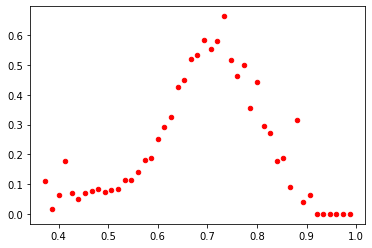

In [43]:
data_list = cretate(data, [], ["Age"], [list(range(28,76))])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x[x["number"] > 0]
x = x.iloc[1:48]
plt.scatter(np.array(list(range(28,75)))/75,x["ratio of exit"],s=20, color = "red")

In [44]:
#通過測試發現信用評級低於480的顧客退出的機率超高,其他的顧客則與一般無異
x = data[data["CreditScore"] <= 480]
print(len(x[x["Exited"]==1])/len(x))

0.9444444444444444


In [45]:
#通過測試發現餘額約等於62000的顧客有非常多的數量,足以與其他顧客分離並且組成一群.兩群的退出比率有明顯差距
x = data
x = x[x["Balance"] >= 70000]
x = x[x["Balance"] <= 200000]
print(len(x[x["Exited"]==1])/len(x))
x = data
x = x[x["Balance"] >= 0]
x = x[x["Balance"] <= 70000]
print(len(x[x["Exited"]==1])/len(x))

0.24278941129988146
0.13716814159292035


6368 1632
0.796 0.204


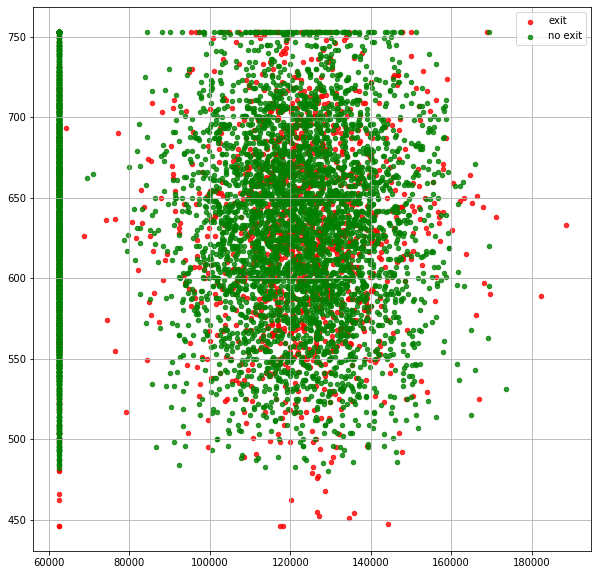

In [46]:
y = ["Geography", "NumOfProducts", "IsActiveMember", "Gender"]
x = data
#(testing_data)
#x = x[x["NumOfProducts"] == 3]
#x = x[x["Geography"] == "Spain"]
#x = x[x["Gender"] == "Male"]
#x = x[x["IsActiveMember"] == 0]
#x = x[x["HasCrCard"] == 1]
#x = x[x["CreditScore"] >= 0]
#x = x[x["CreditScore"] <= 480]
#x = x[x["EstimatedSalary"] >= 100000]
#x = x[x["EstimatedSalary"] <= 200000]
#x = x[x["Balance"] >= 100000]
#x = x[x["Balance"] <= 200000]
plt.figure(figsize = (10, 10))
index_0 = np.array([x["Balance"][x["Exited"]==0],x["CreditScore"][x["Exited"]==0]])
index_1 = np.array([x["Balance"][x["Exited"]==1],x["CreditScore"][x["Exited"]==1]])
print(len(index_0[1]),len(index_1[1]))
print(len(index_0[1])/len(x),len(index_1[1])/len(x))
plt.scatter(index_1[0],index_1[1],s=20, color = "red",alpha=0.8,label="exit")
plt.scatter(index_0[0],index_0[1],s=20, color = "green",alpha=0.8,label="no exit")
plt.legend(loc="upper right")
plt.grid(b=True)